In [ ]:
import pandas as pd
import numpy as np
import argparse
import csv
import json
import os
import random
import sys

In [ ]:
cleanedmerchants = pd.read_csv('data/cleanedmerchant_training.csv')
len(cleanedmerchants[cleanedmerchants['ds_mid']==0]) / len(cleanedmerchants)


In [ ]:
unmapped = cleanedmerchants[cleanedmerchants['ds_mid']==0]

from nltk import word_tokenize
raw_docs = unmapped['merchant_name'].to_list()
tokenized_docs = [word_tokenize(doc) for doc in raw_docs if isinstance(doc, str)]
len(tokenized_docs) + 1 == len(raw_docs)
# #all(isinstance(x, str) for x in raw_docs)
# for doc in raw_docs:
#     if not isinstance(doc, str):
#         print(doc)

In [ ]:
len(unmapped)

In [74]:

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
states.extend([string.lower() for string in states])
states.append('us')
states.append('US')

In [75]:
from nltk.corpus import stopwords
list_of_words_all = [item for sublist in tokenized_docs for item in sublist]
list_of_words = [word for word in list_of_words_all if word not in stopwords.words('english') and word not in states]
from collections import Counter
ctr = Counter(list_of_words)

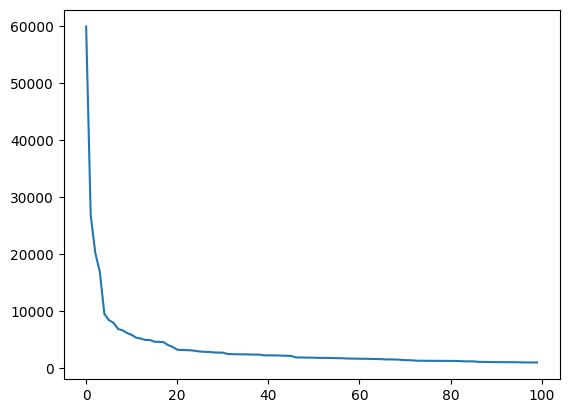

In [77]:
import matplotlib.pyplot as plt
most_common = ctr.most_common(100)
# most_common
x = range(0, len(most_common))
y = [most_common[i][1] for i in range(len(most_common))]

plt.plot(x, y)
plt.show()

In [78]:
commonword_removed_docs = [doc for doc in tokenized_docs if len(set(doc).intersection(common_words)) < 3]


In [79]:
print(len(commonword_removed_docs))
print(len(tokenized_docs))

355760
395283


In [81]:
lines = list(commonword_removed_docs)
with open('words.txt', 'w') as f:
    for line in lines:
        f.write(' '.join(line))
        f.write('\n')

In [ ]:
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"LOWER": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span)

In [ ]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

In [ ]:
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]
for ent in doc.ents:
    print(ent.text)

In [ ]:
import spacy
# spacy.download("en_core_web_md")
nlp = spacy.load("en_core_web_lg")

# Compare two documents
doc1 = nlp("I like fast food and fried chicken")
token1 = doc1[2:4]
token2 = doc1[5:6]

print(token1.similarity(token2))

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

# with open("exercises/en/countries.json", encoding="utf8") as f:
#     COUNTRIES = json.loads(f.read())
# with open("exercises/en/country_text.txt", encoding="utf8") as f:
#     TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)

patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {"TEXT": "-"}, {"LOWER": "free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

#### method extension on the Doc or span objects, the first argument is equivalent to "self"

In [ ]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

### custom pipeline components with added doc attribute/method extensions

In [ ]:
import json
import spacy
from spacy.language import Language
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

with open("exercises/en/capitals.json", encoding="utf8") as f:
    CAPITALS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", list(nlp.pipe(COUNTRIES)))


@Language.component("countries_component")
def countries_component_function(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label="GPE") for match_id, start, end in matches]
    return doc


# Add the component to the pipeline
nlp.add_pipe("countries_component")
print(nlp.pipe_names)

# Getter that looks up the span text in the dictionary of country capitals
get_capital = lambda span: CAPITALS.get(span.text)

# Register the Span extension attribute "capital" with the getter get_capital
Span.set_extension("capital", getter=get_capital)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

In [ ]:
scleandataset = pd.read_csv('data/dataset.csv')
cleandataset.columns

### Skip the below two cells if you have shuffled_dataset in data folder.

In [ ]:
from sklearn.utils import shuffle
from random import shuffle

shuffle_1 = cleandataset.copy()
shuffle_2 = cleandataset.copy()

from nltk.tokenize import word_tokenize
# shuffle_1['merchant_name'] = shuffle_1['merchant_name'].apply(lambda sentence: ' '.join(random.sample(sentence.split(' '), k = len(sentence.split(' ')))))
# # shuffle_1.head()
# shuffle_2['merchant_name'] = shuffle_2['merchant_name'].apply(lambda sentence: ' '.join(random.sample(sentence.split(' '), k = len(sentence.split(' ')))))
# shuffle_2.sample(5)
for idx, row in shuffle_1.iterrows():
    if len(row[1].split()) > 1:
        try:
            sidx = row[0].find(row[1])
            eidx = sidx + len(row[1])
            merchant = row[1]
            tempsentence = row[0][:]
            insertion_pos = tempsentence.split().index(merchant.split()[0])
            tempsentence_removed_tokenized = tempsentence.replace(row[1], ' ').split()
            tempsentence_removed_tokenized.insert(insertion_pos, merchant)
            shuffled_sentence = ' '.join(random.sample(tempsentence_removed_tokenized, k = len(tempsentence_removed_tokenized)))
            shuffle_1.iloc[idx, 0] = shuffled_sentence

        except:
            continue
    else:
        shuffle_1.iloc[idx, 0] = ' '.join(random.sample(row[0].split(' '), k = len(row[0].split(' '))))

shuffle_1.reset_index(drop = True)
for idx, row in shuffle_1.iterrows():
    shuffle_1.iloc[idx, 2] = shuffle_1.iloc[idx, 0].find(shuffle_1.iloc[idx, 1])
    shuffle_1.iloc[idx, 3] = shuffle_1.iloc[idx, 2] + len(shuffle_1.iloc[idx, 1])
shuffle_1.sample(5)



In [ ]:
for idx, row in shuffle_2.iterrows():
    if len(row[1].split()) > 1:
        try:
            sidx = row[0].find(row[1])
            eidx = sidx + len(row[1])
            merchant = row[1]
            tempsentence = row[0][:]
            insertion_pos = tempsentence.split().index(merchant.split()[0])
            tempsentence_removed_tokenized = tempsentence.replace(row[1], ' ').split()
            tempsentence_removed_tokenized.insert(insertion_pos, merchant)
            shuffled_sentence = ' '.join(random.sample(tempsentence_removed_tokenized, k = len(tempsentence_removed_tokenized)))
            shuffle_2.iloc[idx, 0] = shuffled_sentence

        except:
            continue
    else:
        shuffle_2.iloc[idx, 0] = ' '.join(random.sample(row[0].split(' '), k = len(row[0].split(' '))))

shuffle_2.reset_index(drop = True)
for idx, row in shuffle_2.iterrows():
    shuffle_2.iloc[idx, 2] = shuffle_2.iloc[idx, 0].find(shuffle_2.iloc[idx, 1])
    shuffle_2.iloc[idx, 3] = shuffle_2.iloc[idx, 2] + len(shuffle_2.iloc[idx, 1])
shuffle_2.sample(5)

In [ ]:
result_temp = pd.concat([cleandataset, shuffle_1], axis = 0)
result = pd.concat([result_temp, shuffle_2], axis = 0)
result.sample(5)

In [ ]:
result.reset_index(drop=True)

In [ ]:
result.to_csv('data/shuffled_dataset.csv')

In [ ]:
mvb = pd.read_csv('data/mvb_cleanedmerchant_training_fourbanks.csv', on_bad_lines = 'warn')

In [ ]:
mvb.columns

In [ ]:
result = pd.read_csv('data/shuffled_dataset.csv')
if 'Unnamed: 0' in result.columns:
    result.drop(columns=['Unnamed: 0'], inplace = True)
    
TRAIN_DATA = result.values.tolist()
#TRAIN_DATA = [(item[0], {'merchant': item[1], 'entities':[(item[2], item[3], 'BRD')]}) for item in TRAIN_DATA]
TRAIN_DATA = [(item[0], {'entities':[(item[2], item[3], 'BRD')]}) for item in TRAIN_DATA]
TRAIN_DATA[:5]

In [ ]:
result.sample(10)

In [ ]:
import spacy
import random
from random import sample
from sklearn.model_selection import train_test_split
from spacy.util import minibatch, compounding
from spacy.gold import GoldParse
import warnings

warnings.filterwarnings("ignore")

def train_spacy(data,iterations):
    TRAIN_DATA = data
    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
    # add labels
    for _, annotations in TRAIN_DATA:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])
    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(iterations):
            print("Starting iteration " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            batches = minibatch(TRAIN_DATA, size = compounding(4, 32, 1.001))
            for batch in batches:
                text, annotations = zip(*batch)
                # text = nlp.make_doc(text)    #<--- add this
                # gold = GoldParse(text, entities=annotations)  #<--- add this
                nlp.update(
                    text,  # batch of texts
                    annotations,  # batch of annotations
                    sgd = optimizer,  # callable to update weights
                    drop = 0.35,
                    losses=losses)
            print(losses)
    return nlp

random.shuffle(TRAIN_DATA)

train = TRAIN_DATA[:int(len(TRAIN_DATA) *0.07)]
test = TRAIN_DATA[int(len(TRAIN_DATA) *0.07):]

prdnlp = train_spacy(train, 100)
# Save our trained Model
modelfile = 'wtf_3_100_epoch'
prdnlp.to_disk(modelfile)


In [ ]:
## save the trained pipeline into a .tar.gz package
!python -m spacy package wtf_2 ./packages 


In [ ]:
## generation of a  config
!python -m spacy init config ./config.cfg --lang en --pipeline ner

In [ ]:
# import spacy
# from spacy.tokens import Span
# nlp = spacy.blank("en")
# doc3 = nlp("There's also a Paris in Arkansas, lol")
# for ent in doc3.ents:
#     print(ent.text)

In [ ]:
# test = TRAIN_DATA[int(len(TRAIN_DATA) *0.07):]

In [ ]:
#Test your text

TESTDATA = result.values.tolist()
TESTDATA = [(item[0], {'merchant': item[1], 'entities':[(item[2], item[3], 'BRD')]}) for item in TESTDATA]
test = TESTDATA[int(len(TESTDATA) *0.07):]

from fuzzywuzzy import fuzz
test_text = sample(test, 1000)
scores = []
for text in test_text:
    #print('test case: ', text)
    doc = prdnlp(text[0])
    for ent in doc.ents:
        # print(ent.text)
        # print('True label is: ')
        # print(text[1]['merchant'])
        similarity = fuzz.token_set_ratio(ent.text,text[1]['merchant'])
        #print('similarity is: ', similarity)
        scores.append(similarity)
print(scores.count(100) / len(scores) *100, ' percent of test data has been perfectly correctly classified.')


In [ ]:
load_nlp = spacy.load('wtf_2')
test_text = sample(test, 10)
for text in test_text:
    print('test case: ', text)
    doc = load_nlp(text[0])
    for ent in doc.ents:
        print(ent.text)

In [ ]:
doc = load_nlp('brother s 3659 nebrask')
for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
tempdata = pd.read_csv('data/cleanedmerchant_training.csv') ## read the file into to a pandas dataframe
data = tempdata[['merchant_name', 'cleanName2']]
invalidName = data[data['cleanName2'].isnull()]
invalidName.reset_index(inplace=True, drop = True)
invalidName.sample(50)

In [ ]:
from nltk import word_tokenize

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# mu, sigma = 100, 10 # mean and standard deviation
# s = np.random.normal(mu, sigma, 1000)
# s_2 = np.random.uniform(70, 130, 1000)

# count, bins, ignored = plt.hist(s, 30, density=False, color = 'r')
# # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
# #                np.exp( - (bins - mu)**2 / (2 * sigma**2) )
# #          )
# plt.show()

In [ ]:
# raw_docs = ["Here are some very simple basic sentences.",
# "They won't be very interesting, I'm afraid.",
# "The point of these examples is to _learn how basic text cleaning works_ on *very simple* data."]
raw_docs = validName['merchant_name'].to_list()
tokenized_docs = [word_tokenize(doc) for doc in raw_docs]
print(tokenized_docs[2])

In [ ]:
import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html

tokenized_docs_no_punctuation = []

for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    tokenized_docs_no_punctuation.append(new_review)
    
print(tokenized_docs_no_punctuation[2])

In [ ]:
{'def', 'def', 'dasdsa'}

In [ ]:
from nltk.corpus import stopwords

tokenized_docs_no_stopwords = []

for doc in tokenized_docs_no_punctuation:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    tokenized_docs_no_stopwords.append(new_term_vector)

print(tokenized_docs_no_stopwords[2])

In [ ]:
cleaned_sentences = [' '.join(words) for words in tokenized_docs_no_stopwords]
len(cleaned_sentences) == len(validName)

In [ ]:
validName['merchant_name'] = cleaned_sentences

In [ ]:
def shuffle_dataset(dataset):
    """
    Shuffle samples in dataset.

    Args:
        dataset: (list) list of tuples like: [(transaction, start_idx, end_idx), ..... , ]

    Returns:
        dataset: (list) list of tuples like: [,....., (transaction, start_idx, end_idx), ..... , ]

    """

    shuffled_indices = list(range(len(dataset)))
    random.shuffle(shuffled_indices)
    dataset = [dataset[index] for index in shuffled_indices]

    return dataset
def get_merchant_indices_in_sentence(sentence, merchant):
    """
    Given transaction string and merchant string, returns start end end indices of merchant in transaction string.

    Args:
        sentence: (string) transaction string. (example: )
        merchant: (string) merchant name. (example: )

    Returns:
        sentence: (string) converted to upper strings
        start: (int) merchant string start index
        end: (int) merchant string end index

    Examples:
        sentences, start, end = get_sentence_indices("Target 00014423 WATERTOWN MA","target")

        sentences: "TARGET 00014423 WATERTOWN MA"
        start: 0
        end: 6
    """

    sentence = sentence.upper()
    merchant = merchant.upper()

    start = -1
    end = -1

    idx = sentence.find(merchant)
    if idx != -1:
        start = idx
        end = start + len(merchant)

    return sentence, start, end

In [ ]:
validName.sample(10)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

for idx, row in validName.iterrows():
    # print('Processing row: ', idx)
    # print('row0: ', row[0])
    # print('row1: ', row[1])
    # print(row[0].find(row[1].split(' ')[0]))
    # print(len(row[1]))
    find_i = row[0].find(row[1].split(' ')[0])
    if find_i + len(row[1]) > len(row[0]):   
        row[0] = row[0][:find_i] + row[1]
    
    sentence, start, end = get_merchant_indices_in_sentence(row[0], row[1])
    validName.loc[idx, 'start_idx'] = start
    validName.loc[idx, 'end_idx'] = end

print(validName.sample(50))
#validName.to_csv('data/dataset.csv')

In [ ]:
validName.to_csv('data/dataset.csv')

In [ ]:
cleandataset = cleandataset.drop(columns = 'Unnamed: 0')
cleandataset.columns

In [ ]:
cleandataset.index

In [ ]:
cleandataset = cleandataset[cleandataset['start_idx']!=-1]
len(cleandataset)

In [ ]:
cleandataset.reset_index(drop=True)

In [ ]:
cleandataset.to_csv('data/dataset.csv')

In [ ]:
def character_embedding(text, max_len=300, emb_dim=8):
        """
        Embeds character string with the use of (emb_dim)-bit binary values of each character.

        Args:
            text: (string) text to embed
            max_len: (int) maximum length of text that will be encoded. Padding will be done with zeros.
            emb_dim:

        Returns:
            str_array: (ndarray) 2 dimensional numpy array containing embedded text of shape emb_dim*max_len

        """

        # cut long text with maximum accepted length
        if len(text) > max_len:
            text = text[:max_len]

        str_array = np.zeros((emb_dim, max(len(text), max_len)), dtype=np.int32).tolist()

        for index, char in enumerate(text):
            str_binary = format(ord(char), 'b').zfill(emb_dim)[::-1]
            str_binary = str_binary[:emb_dim]
            for str_index, str_char in enumerate(str_binary, 0):
                str_array[str_index][index] = int(str_char)
       
        padding_str_binary = '0' * emb_dim
        
        for index in range(len(text), max_len):
            for str_index, str_char in enumerate(padding_str_binary, 0):
                str_array[str_index][index] = int(str_char)

        return str_array

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
emb = character_embedding('Martin')
emb

In [ ]:
df = cleandataset.sample(frac=1).reset_index(drop=True)

In [ ]:
train_dataset = df[:int(0.7 * len(df))]
val_dataset = df[int(0.7 * len(df)): int(0.85 * len(df))]
test_dataset = df[int(0.85 * len(df)):]

In [ ]:
train_dataset.head(50)

#### Rule matching

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("sID", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

In [ ]:
import spacy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import re

nlp = spacy.load("en_core_web_sm")
doc = nlp("dollar general w main a")
print(doc.ents)
# for idx, row in sample_10.iterrows():
#     # print('processing row: ', idx)
#     # print(row[0])
#     doc = nlp(row[0])
#     all_entities = doc.ents
#     print(all_entities)
#     # print(all_entities)
#     #extraction_temp = str(process.extractOne(row[1], all_entities)[0])
#     #extraction =  re.sub(r"inc|mktp|\d+", "", extraction_temp) 
#     #print('extraction result: ', extraction_temp)

In [ ]:
import pandas as pd
import numpy as np
cleanData = pd.read_csv('data/cleanedmerchant_training.csv')
cleanData.columns

In [ ]:
# stopwordFreeds[(stopwordFreeds['cleanName2'] != stopwordFreeds['CleanName3']) & (stopwordFreeds['CleanName3'] != 'chick fil')].sample(1000)

In [ ]:
cleanData.head()